# KNN and decision tree classification
In this lab, we will work with the DonorChoose.org dataset from KDD Cup 14 to predict whether a funding request is exciting or not. Keep your work organized as we will use the same data and problem in the following labs as well. 

## Download the datasets from the KDD website
The first step is to download the dataset from [Kaggle website](http://www.kaggle.com/c/kdd-cup-2014-predicting-excitement-at-donors-choose/data). You can look at the definition of 'is exciting' as well as some explanation of the data fields in the given link. In this lab, we will use Python, Pandas, numpy and scikit-learn.

In [93]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

First, check the size of the datasets:

In [82]:
# example:
dataframe  = pd.read_csv('projects.csv')
print (dataframe.shape[0])
outcomes = pd.read_csv('outcomes.csv')

664098


In [83]:
dataframe = dataframe.merge(outcomes, how = 'inner', on = 'projectid')

The dataset contains
- projects    :  664098  
- resources  :  3667217
- essays       :  664098
- outcomes  :   619326
- donations  :   3097989



## plotting the data
Plot the exciting projects based on their date. See whether there is any interesting result there.

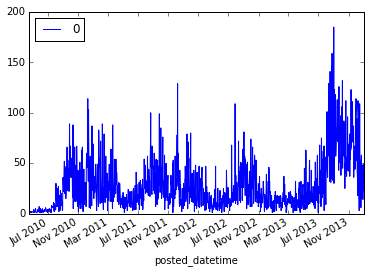

In [84]:

is_exciting = dataframe.is_exciting == 't'


dataframe['posted_datetime']=pd.to_datetime(dataframe.date_posted)

exciting = dataframe[is_exciting]

exciting.groupby('posted_datetime').size().to_frame().plot()



You will see that there is no exciting projects before 2010-04-14. This can effect the accuracy of prediction. The reason is DonorsChoose.org simply did not keep track of some of the requirements needed to decide 'is_exciting'. How can you avoid this issue in your prediction?

## Load the CSV files into Pandas and preprocess as needed
Let us stick to projects.csv and outcomes.csv for the tasks in this lab session for now. Check whether there are Null instances or other problems in your data  you should take care of.

In [85]:
exciting_lng = pd.melt(exciting)
null_vars = exciting_lng.value.isnull()
pd.crosstab(exciting_lng.variable, null_vars)

value,False,True
variable,,
at_least_1_green_donation,36710,0
at_least_1_teacher_referred_donor,36710,0
date_posted,36710,0
donation_from_thoughtful_donor,36710,0
eligible_almost_home_match,36710,0
eligible_double_your_impact_match,36710,0
fulfillment_labor_materials,36710,0
fully_funded,36710,0
grade_level,36710,0


In [75]:
exciting_sansNA = exciting.dropna()

## Prediction tasks
In this lab we ask you to work on the following two prediction tasks. The first one is a binary classfication and the second one is a multi-class classification problem.

### Task 1
Predict whether a project is exciting by picking the features you chose from the dataset. Feel free to make new features from the existing ones.

### Task 2
Predict the Poverty level of the school. Which feature would you pick from the dataset?

## Choose your features
For each task, choose some of the data fields from projects.csv that you think could be used as useful features for predicting the 'is-exciting' and poverty level outcome.

In [76]:
exciting.dtypes

projectid                                                 object
teacher_acctid                                            object
schoolid                                                  object
school_ncesid                                            float64
school_latitude                                          float64
school_longitude                                         float64
school_city                                               object
school_state                                              object
school_zip                                               float64
school_metro                                              object
school_district                                           object
school_county                                             object
school_charter                                            object
school_magnet                                             object
school_year_round                                         object
school_nlns              

primary_focus_area, secondary_focus_area, donation_from_thoughtful_donor, teacher_referred_count

## Form your train and test set
Separate a portion of your data as train and the other portion as test set to work with. Keep these two sets fixed for all of your experiments and choose them randomly. You can use the following:

In [77]:
from sklearn.cross_validation import train_test_split

In [117]:
dataframe = dataframe.dropna()

In [118]:
X_train, X_test, y_train, y_test = train_test_split(dataframe[['primary_focus_area', 'secondary_focus_area', 'donation_from_thoughtful_donor', 'teacher_referred_count']], dataframe['is_exciting'], test_size=0.33, random_state=42)

## Train your models and test on your test data

### First step

Train KNN and Decision Tree models with your training set for each task. Choose some initial parameters for your models and see how they perform on the test set for these tasks.

In [90]:
# You may need to import these:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [106]:
X_train.head()

,primary_focus_area,secondary_focus_area,donation_from_thoughtful_donor,teacher_referred_count
340997,Literacy & Language,Literacy & Language,NaN,NaN
281457,Math & Science,NaN,f,0.0
336281,Literacy & Language,Literacy & Language,f,2.0
548288,Special Needs,Special Needs,f,0.0
507015,Math & Science,Math & Science,f,0.0


In [119]:
X_train = pd.concat([X_train['teacher_referred_count'].astype(int), pd.get_dummies(X_train[['primary_focus_area','secondary_focus_area','donation_from_thoughtful_donor']])])

/home/ayaspan/.local/lib/python3.4/site-packages/pandas/indexes/api.py:71: RuntimeWarning: unorderable types: int() < str(), sort order is undefined for incomparable objects
  result = result.union(other)


In [120]:

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_dummies)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Explore the models you just built

### kNN
For kNN, take a few points and retrieve neirest neighbors for each of them? Do the neighbors make sense? 
Would you change the distance function to get "better" neighbors?

### Decision Trees
For Decision Trees, can you visualize or print out the tree? Try using sklearn.tree.export_graphviz()

## How do these models change as you vary the parameters?

### For kNN, see what happens when:
- you do or do not scale/normalize features
- you vary k from very small to very large
- you vary distance metrics
- you vary distance weighting

### For decision trees, try similar ideas:
- vary pruning and stopping strategies, use the following parameters:
    - min_impurity_split
    - min_samples_split
- vary splitting criteria, use the following parameters:
    - max_depth
    - mean_samples_leaf
    - max_leaf_nodes
    
Check the reference below for description of these parameters

## Operationalizing this search through the parameter space

Can you put all all of these variations in a nested for loop and run all of them and look at the performance of the models?

## References
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

http://scikit-learn.org/stable/modules/tree.html

Different parameters for decision tree:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier